<a href="https://colab.research.google.com/github/junhojjangjjangman/DNN/blob/main/%EC%BA%A1%EC%8A%A4%ED%86%A4_%EB%B6%84%EB%A5%98_DNN%EC%82%AC%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. 라이브러리 가져오기

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline
np.random.seed(123)

### 2. Test,Train데이터 읽어오기

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/Capstone/test.csv")
df_test.head()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,3,0.280,-0.0195,-0.113,-0.995,-0.967,-0.979,-0.997,-0.964,-0.977,...,0.4150,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491
1,5,0.277,-0.0166,-0.115,-0.998,-0.981,-0.990,-0.998,-0.980,-0.990,...,0.0878,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439
2,9,0.277,-0.0218,-0.121,-0.997,-0.961,-0.984,-0.998,-0.957,-0.984,...,0.3140,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374
3,17,0.279,-0.0148,-0.117,-0.997,-0.982,-0.983,-0.997,-0.982,-0.981,...,0.5610,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270
4,26,0.279,-0.0145,-0.107,-0.998,-0.986,-0.993,-0.998,-0.985,-0.995,...,0.6770,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/Capstone/train.csv")
df_train.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


###3. 데이터 프레임 정보 확인

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Columns: 563 entries, rn to angle.Z.gravityMean
dtypes: float64(561), int64(1), object(1)
memory usage: 15.5+ MB


In [ ]:
df_train.describe()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
count,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,...,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
mean,5152.430590,0.274544,-0.017415,-0.109195,-0.608457,-0.506265,-0.614482,-0.634634,-0.521660,-0.616047,...,0.128804,-0.300815,-0.619400,0.007561,0.009484,0.029185,-0.010632,-0.496977,0.060040,-0.050202
std,2975.767839,0.063589,0.042589,0.056218,0.439157,0.501627,0.399514,0.413194,0.485282,0.394932,...,0.240278,0.317963,0.308303,0.332249,0.448971,0.613615,0.490830,0.509336,0.311308,0.263935
min,7.000000,-0.521000,-1.000000,-0.926000,-1.000000,-0.999000,-1.000000,-1.000000,-0.999000,-1.000000,...,-0.786000,-0.968000,-0.995000,-0.969000,-0.997000,-1.000000,-0.993000,-0.999000,-1.000000,-0.971000
25%,2570.000000,0.262000,-0.025200,-0.122000,-0.992000,-0.976000,-0.979000,-0.993000,-0.976000,-0.978000,...,-0.015800,-0.533000,-0.836000,-0.118000,-0.281000,-0.478000,-0.398000,-0.816000,-0.015600,-0.122000
50%,5158.000000,0.277000,-0.017200,-0.109000,-0.939000,-0.812000,-0.844000,-0.946000,-0.816000,-0.837000,...,0.132000,-0.341000,-0.706000,0.007740,0.009830,0.029600,-0.013400,-0.716000,0.183000,-0.005260
75%,7727.000000,0.287000,-0.011000,-0.098000,-0.254000,-0.051700,-0.283000,-0.306000,-0.084500,-0.288000,...,0.290000,-0.118000,-0.501000,0.142000,0.309000,0.554000,0.374000,-0.522000,0.252000,0.104000
max,10281.000000,0.693000,1.000000,1.000000,1.000000,0.980000,1.000000,1.000000,0.988000,1.000000,...,0.871000,0.990000,0.957000,0.981000,0.997000,0.999000,0.996000,0.977000,1.000000,0.998000


In [ ]:
df_train.isnull().sum()

rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64

In [ ]:
cal_cols = df_train.select_dtypes('object').columns.values
cal_cols

array(['activity'], dtype=object)

범주형 변수를 수치형 변수로 변경  
1. 라벨 인코딩 방식  
2. 원 핫 인코딩 방식  
**[Label Encoding]**  

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 라벨인코더 선언 및 Fitting
le = LabelEncoder()

le.fit(df_train['activity'])

# 인코딩한 데이터로 변환
le_encoded = le.transform(df_train['activity'])

# 결과물을 확인하면 array 형태로 나옵니다.
# 아래는 라벨 인코딩으로 만들어낸 데이터를 데이터 프레임으로 만들어주는 코드입니다.
new_cat = pd.DataFrame(le_encoded, columns = ['result'])
df_train1 = df_train
df_train1['activity'] = new_cat
# 아래 코드를 실행시키면 인코딩된 class를 확인할 수 있습니다.
df_train1.head()


,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,2,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,2,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,2,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,2,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,2,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


**[One-Hot-Encoding]**

In [ ]:
df1 = pd.get_dummies(data=df_train, columns=cal_cols)
df1.head()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean,activity_0,activity_1,activity_2,activity_3,activity_4,activity_5
0,7,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,-0.983,...,-0.190,-0.852,0.182,-0.0430,0,0,1,0,0,0
1,11,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,-0.985,...,0.116,-0.852,0.188,-0.0347,0,0,1,0,0,0
2,14,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,-0.992,...,0.499,-0.850,0.189,-0.0351,0,0,1,0,0,0
3,15,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,-0.888,...,-0.269,-0.731,0.283,0.0364,0,0,1,0,0,0
4,20,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,-0.997,...,-0.412,-0.761,0.263,0.0296,0,0,1,0,0,0


###4.데이터 전처리

In [ ]:
df_train1 = df_train1.drop('rn', axis=1)
df_test = df_test.drop('rn', axis=1)

In [ ]:
df_train1

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,2,0.279,-0.01960,-0.1100,-0.9970,-0.9670,-0.983,-0.997,-0.9660,-0.983,...,0.1460,-0.2170,-0.5640,-0.2130,-0.2310,0.0146,-0.1900,-0.852,0.182,-0.0430
1,2,0.277,-0.01270,-0.1030,-0.9950,-0.9730,-0.985,-0.996,-0.9740,-0.985,...,0.1210,0.3490,0.0577,0.0807,0.5960,-0.4760,0.1160,-0.852,0.188,-0.0347
2,2,0.277,-0.01470,-0.1070,-0.9990,-0.9910,-0.993,-0.999,-0.9910,-0.992,...,0.7400,-0.5640,-0.7660,0.1060,-0.0903,-0.1320,0.4990,-0.850,0.189,-0.0351
3,2,0.298,0.02710,-0.0617,-0.9890,-0.8170,-0.902,-0.989,-0.7940,-0.888,...,0.1310,0.2080,-0.0681,0.0623,-0.0587,0.0312,-0.2690,-0.731,0.283,0.0364
4,2,0.276,-0.01700,-0.1110,-0.9980,-0.9910,-0.998,-0.998,-0.9890,-0.997,...,0.6670,-0.9420,-0.9660,0.2450,0.1030,0.0661,-0.4120,-0.761,0.263,0.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,5,0.357,-0.04460,-0.1300,-0.3140,-0.0556,-0.173,-0.386,-0.0575,-0.217,...,0.0168,-0.1630,-0.5930,-0.7110,-0.0612,-0.7060,0.0646,-0.660,0.274,0.1760
3605,5,0.344,0.00479,-0.1220,-0.3200,-0.0667,-0.182,-0.380,-0.0710,-0.245,...,-0.0292,0.1810,-0.2500,-0.4030,-0.7060,0.7390,0.8710,-0.653,0.278,0.1800
3606,5,0.284,-0.00796,-0.1190,-0.3090,-0.0804,-0.211,-0.369,-0.0971,-0.301,...,-0.1100,0.0245,-0.3930,-0.0761,-0.2390,0.9600,0.0866,-0.657,0.272,0.1830
3607,5,0.207,0.02460,-0.1040,-0.3650,-0.1690,-0.216,-0.449,-0.1860,-0.326,...,-0.2140,-0.3520,-0.7340,0.5350,-0.2570,0.9270,-0.0843,-0.657,0.267,0.1880


타겟 데이터와 라벨링 데이터 분류

In [ ]:
X = df_train1.drop('activity', axis=1).values
y = df_train1['activity'].values
print(X)
print(y)

[[ 0.279   -0.0196  -0.11    ... -0.852    0.182   -0.043  ]
 [ 0.277   -0.0127  -0.103   ... -0.852    0.188   -0.0347 ]
 [ 0.277   -0.0147  -0.107   ... -0.85     0.189   -0.0351 ]
 ...
 [ 0.284   -0.00796 -0.119   ... -0.657    0.272    0.183  ]
 [ 0.207    0.0246  -0.104   ... -0.657    0.267    0.188  ]
 [ 0.393   -0.0178  -0.0902  ... -0.807    0.19     0.118  ]]
[2 2 2 ... 5 5 4]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=42)

In [ ]:
X_train.shape, X_test.shape

((2526, 561), (1083, 561))

In [ ]:
y_train.shape

(2526,)

In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5])

In [ ]:
X.shape

(3609, 561)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

In [ ]:
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### 5. 학습 시키기

In [ ]:
import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

tf.random.set_seed(100)

In [ ]:
batch_size = 16
epochs = 20

In [ ]:
drop_prob1, drop_prob2 = 0.3, 0.2
model_dnn = tf.keras.Sequential([
    tf.keras.layers.Dense(128,  activation='relu', input_shape=(561,)),
    tf.keras.layers.Dropout(drop_prob1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(drop_prob1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(drop_prob2),
    tf.keras.layers.Dense(6, activation='softmax')
    ])

In [ ]:
model_dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               71936     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 6)                 7

In [ ]:
model_dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_dnn.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=20, 
          batch_size=32)

Epoch 1/20
79/79 [==============================] - 6s 19ms/step - loss: 1.1691 - accuracy: 0.4901 - val_loss: 0.5960 - val_accuracy: 0.6971
Epoch 2/20
79/79 [==============================] - 1s 9ms/step - loss: 0.5445 - accuracy: 0.7553 - val_loss: 0.3280 - val_accuracy: 0.8809
Epoch 3/20
79/79 [==============================] - 1s 13ms/step - loss: 0.3782 - accuracy: 0.8349 - val_loss: 0.2916 - val_accuracy: 0.8957
Epoch 4/20
79/79 [==============================] - 1s 7ms/step - loss: 0.3467 - accuracy: 0.8519 - val_loss: 0.2519 - val_accuracy: 0.8883
Epoch 5/20
79/79 [==============================] - 0s 6ms/step - loss: 0.2677 - accuracy: 0.8872 - val_loss: 0.2052 - val_accuracy: 0.9289
Epoch 6/20
79/79 [==============================] - 0s 6ms/step - loss: 0.2601 - accuracy: 0.8959 - val_loss: 0.1660 - val_accuracy: 0.9409
Epoch 7/20
79/79 [==============================] - 0s 6ms/step - loss: 0.2336 - accuracy: 0.9062 - val_loss: 0.1610 - val_accuracy: 0.9501
Epoch 8/20
79/79 [

####  
### Callback : 조기종료, 모델 저장
과적합을 방지하기 위해 사용

In [ ]:
# val_loss 모니터링해서 성능이 5번 지나도록 좋아지지 않으면 조기 종료
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',# 모니터 기준 설정 (val loss) 
                                              mode='min',
                                              verbose=1,
                                              patience=5) # 5회 Epoch동안 개선되지 않는다면 종료

In [ ]:
# val_loss 가장 낮은 값을 가질때마다 모델저장
check_point = tf.keras.callbacks.ModelCheckpoint('best_model.h5',# file명을 지정합니다
                              verbose=1, # 로그를 출력합니다
                              monitor='val_loss',# val_loss 값이 개선되었을때 호출됩니다
                              mode='min',# auto는 알아서 best를 찾습니다. min = val_loss 가장 낮은 값을 가질때마다 모델저장/max
                              save_best_only=True)# 가장 best 값만 저장합니다

In [ ]:
history = model_dnn.fit(x=X_train, y=y_train, 
          epochs=50 , batch_size=20,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop, check_point])

Epoch 1/50
122/127 [===========================>..] - ETA: 0s - loss: 0.1519 - accuracy: 0.9422
Epoch 1: val_loss improved from inf to 0.10221, saving model to best_model.h5
127/127 [==============================] - 1s 5ms/step - loss: 0.1551 - accuracy: 0.9414 - val_loss: 0.1022 - val_accuracy: 0.9686
Epoch 2/50
127/127 [==============================] - ETA: 0s - loss: 0.1703 - accuracy: 0.9386
Epoch 2: val_loss did not improve from 0.10221
127/127 [==============================] - 1s 5ms/step - loss: 0.1703 - accuracy: 0.9386 - val_loss: 0.1362 - val_accuracy: 0.9483
Epoch 3/50
122/127 [===========================>..] - ETA: 0s - loss: 0.1963 - accuracy: 0.9295
Epoch 3: val_loss did not improve from 0.10221
127/127 [==============================] - 1s 4ms/step - loss: 0.1970 - accuracy: 0.9287 - val_loss: 0.1335 - val_accuracy: 0.9483
Epoch 4/50
121/127 [===========================>..] - ETA: 0s - loss: 0.1690 - accuracy: 0.9322
Epoch 4: val_loss did not improve from 0.10221
127/


### 6. 모델 성능 평가

In [ ]:
losses = pd.DataFrame(history.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.155055,0.941409,0.102209,0.968606
1,0.170337,0.938638,0.136228,0.948292
2,0.197010,0.928741,0.133452,0.948292
3,0.166588,0.932700,0.188667,0.935365
4,0.166095,0.938242,0.172306,0.945522


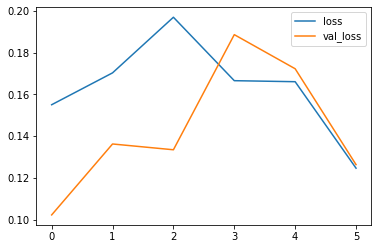

In [ ]:
losses[['loss','val_loss']].plot()

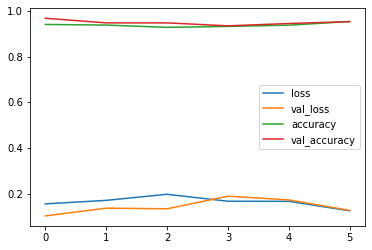

In [ ]:
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

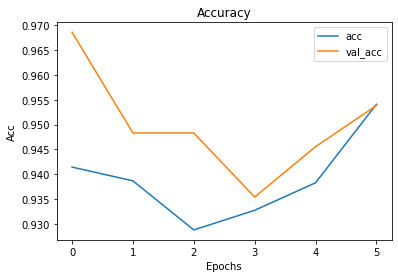

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [ ]:
pred = model_dnn.predict(X_test)

34/34 [==============================] - 0s 2ms/step


In [ ]:
y_pred = np.argmax(pred, axis=1)

In [ ]:
accuracy_score(y_test, y_pred)

0.9538319482917821

In [ ]:
# accuracy, recall, precision 성능 한번에 보기

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       204
           1       0.97      0.80      0.87       187
           2       0.84      0.98      0.91       201
           3       0.99      0.99      0.99       181
           4       1.00      0.97      0.99       148
           5       0.96      0.99      0.98       162

    accuracy                           0.95      1083
   macro avg       0.96      0.95      0.96      1083
weighted avg       0.96      0.95      0.95      1083



### 7. 모델 저장하고 불러오기

In [ ]:
from keras.models import load_model
model_dnn.save('Person_State.h5')

In [ ]:
from keras.models import load_model
model = load_model('Person_State.h5')

In [ ]:
model_dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               71936     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 6)                 7

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               71936     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 6)                 7

### 8.불러온 모델을 이용하여 새로운 데이터 예측하기

In [ ]:
test_predict = model.predict(df_test)

49/49 [==============================] - 0s 2ms/step


In [ ]:
test_y_pred = np.argmax(test_predict, axis=1)

In [ ]:
df_test_pred = pd.DataFrame({'result':test_y_pred})
df_test_pred

,result
0,2
1,2
2,2
3,2
4,2
...,...
1536,4
1537,5
1538,5
1539,4


In [ ]:
df_test['result'] = df_test_pred
df_test

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean,result
0,0.280,-0.01950,-0.1130,-0.9950,-0.9670,-0.979,-0.997,-0.9640,-0.977,-0.9390,...,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491,2
1,0.277,-0.01660,-0.1150,-0.9980,-0.9810,-0.990,-0.998,-0.9800,-0.990,-0.9420,...,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439,2
2,0.277,-0.02180,-0.1210,-0.9970,-0.9610,-0.984,-0.998,-0.9570,-0.984,-0.9410,...,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374,2
3,0.279,-0.01480,-0.1170,-0.9970,-0.9820,-0.983,-0.997,-0.9820,-0.981,-0.9420,...,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270,2
4,0.279,-0.01450,-0.1070,-0.9980,-0.9860,-0.993,-0.998,-0.9850,-0.995,-0.9430,...,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,0.289,-0.02810,-0.0943,-0.0623,0.1140,-0.190,-0.114,0.0393,-0.207,0.3300,...,-0.237,-0.607,-0.19600,0.6980,0.990,-0.108,-0.806,0.190,0.1200,4
1537,0.377,-0.01810,-0.1100,-0.3140,-0.1520,-0.214,-0.394,-0.1810,-0.266,-0.0726,...,-0.323,-0.753,-0.82900,0.0483,0.913,-0.904,-0.695,0.246,0.1730,5
1538,0.253,-0.02490,-0.1700,-0.3080,-0.1890,-0.141,-0.377,-0.2260,-0.221,0.0920,...,-0.142,-0.564,0.00451,0.3570,-0.946,0.614,-0.695,0.259,0.1580,5
1539,0.277,0.00108,-0.0740,-0.0685,-0.2450,-0.145,-0.149,-0.3030,-0.199,0.4030,...,0.161,-0.126,0.13400,0.8830,-0.994,0.475,-0.804,0.197,0.1140,4


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_Decoded = le.inverse_transform(df_test['result'])

# 결과물을 확인하면 array 형태로 나옵니다.
# 아래는 라벨 인코딩으로 만들어낸 데이터를 데이터 프레임으로 만들어주는 코드입니다.
new_cat = pd.DataFrame(le_Decoded, columns = ['result'])
df_test['result'] = new_cat

# 아래 코드를 실행시키면 인코딩된 class를 확인할 수 있습니다.


In [ ]:
df_test

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean,result
0,0.280,-0.01950,-0.1130,-0.9950,-0.9670,-0.979,-0.997,-0.9640,-0.977,-0.9390,...,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491,STANDING
1,0.277,-0.01660,-0.1150,-0.9980,-0.9810,-0.990,-0.998,-0.9800,-0.990,-0.9420,...,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439,STANDING
2,0.277,-0.02180,-0.1210,-0.9970,-0.9610,-0.984,-0.998,-0.9570,-0.984,-0.9410,...,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374,STANDING
3,0.279,-0.01480,-0.1170,-0.9970,-0.9820,-0.983,-0.997,-0.9820,-0.981,-0.9420,...,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270,STANDING
4,0.279,-0.01450,-0.1070,-0.9980,-0.9860,-0.993,-0.998,-0.9850,-0.995,-0.9430,...,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,0.289,-0.02810,-0.0943,-0.0623,0.1140,-0.190,-0.114,0.0393,-0.207,0.3300,...,-0.237,-0.607,-0.19600,0.6980,0.990,-0.108,-0.806,0.190,0.1200,WALKING_DOWNSTAIRS
1537,0.377,-0.01810,-0.1100,-0.3140,-0.1520,-0.214,-0.394,-0.1810,-0.266,-0.0726,...,-0.323,-0.753,-0.82900,0.0483,0.913,-0.904,-0.695,0.246,0.1730,WALKING_UPSTAIRS
1538,0.253,-0.02490,-0.1700,-0.3080,-0.1890,-0.141,-0.377,-0.2260,-0.221,0.0920,...,-0.142,-0.564,0.00451,0.3570,-0.946,0.614,-0.695,0.259,0.1580,WALKING_UPSTAIRS
1539,0.277,0.00108,-0.0740,-0.0685,-0.2450,-0.145,-0.149,-0.3030,-0.199,0.4030,...,0.161,-0.126,0.13400,0.8830,-0.994,0.475,-0.804,0.197,0.1140,WALKING_DOWNSTAIRS
